In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score,accuracy_score,classification_report

In [2]:
df = pd.read_csv("Datasets\\Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop('Id',inplace=True,axis = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

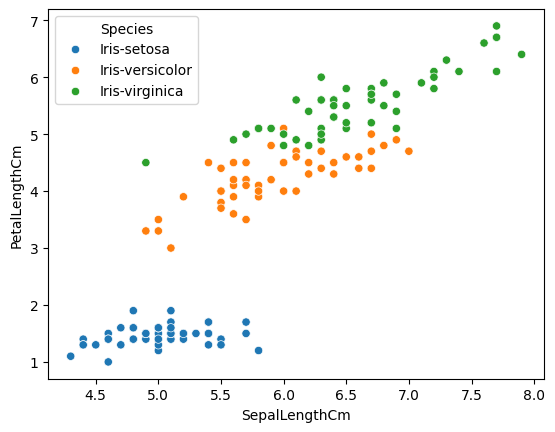

In [6]:
sns.scatterplot(df,x = 'SepalLengthCm',y = 'PetalLengthCm',hue = 'Species')

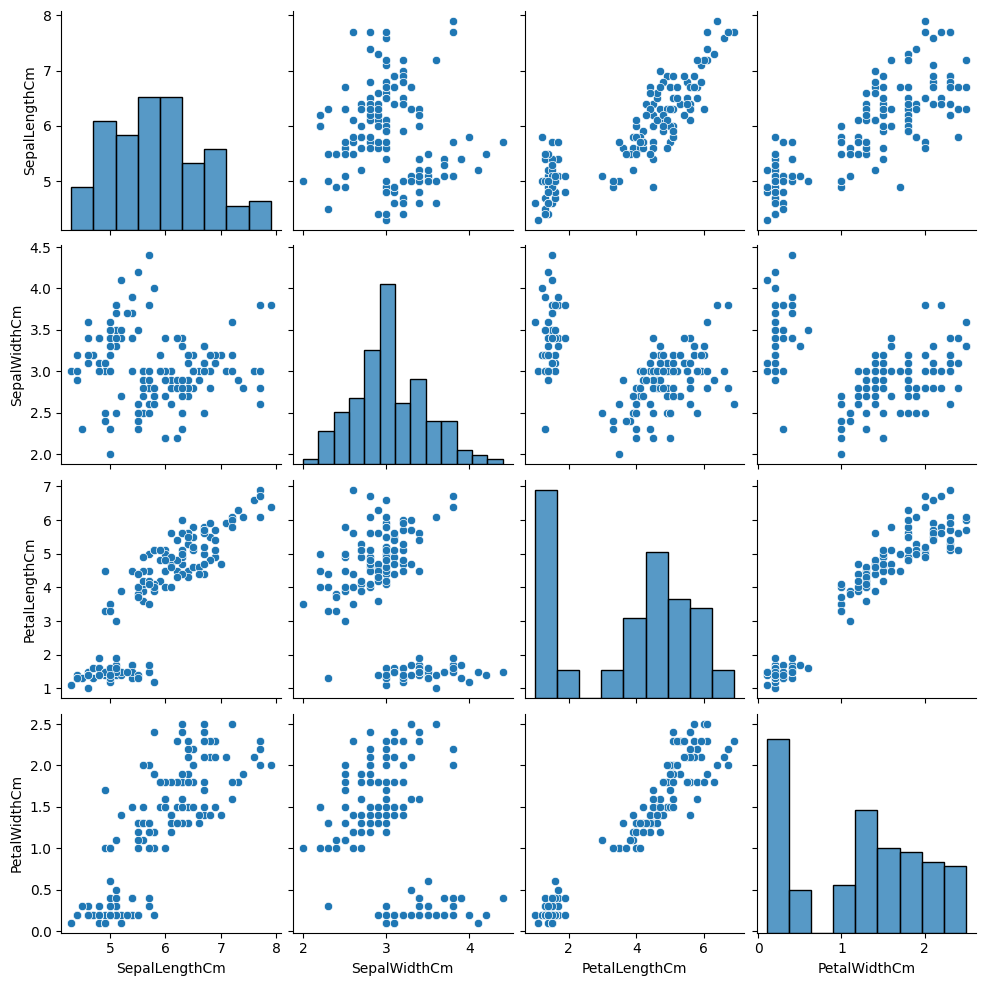

In [7]:
sns.pairplot(df)

In [8]:
def ploting(df,target):
    for i in range(len(df.columns)):
        for j in range(i,len(df.columns)):
            X = df.columns[i]
            y = df.columns[j]
            if i != j and df.columns[i] != target and df.columns[j] != target:
                sns.scatterplot(data = df,x=X,y=y,hue = target)
                plt.xlabel(X)
                plt.ylabel(y)
                plt.title(f'{X} vs {y}')
                plt.grid(True)
                plt.show()

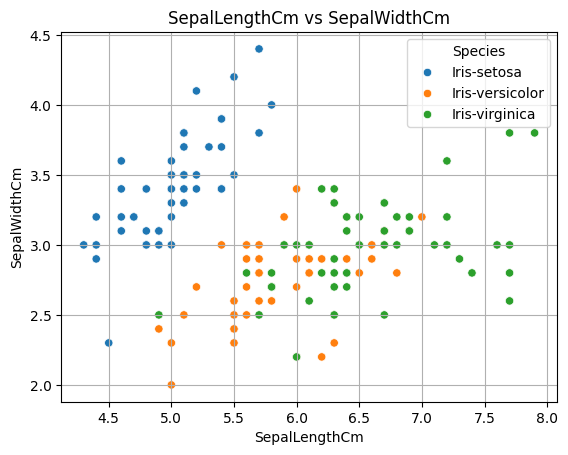

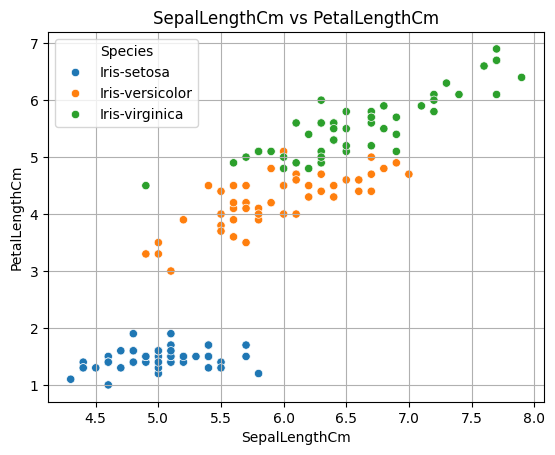

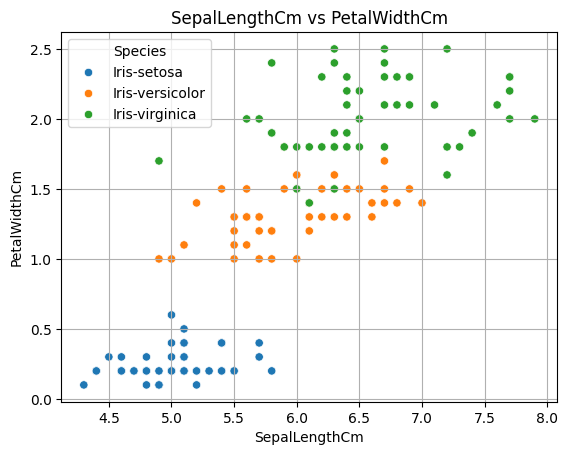

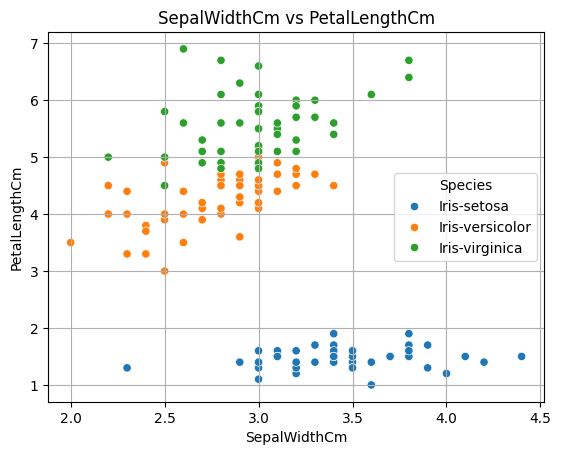

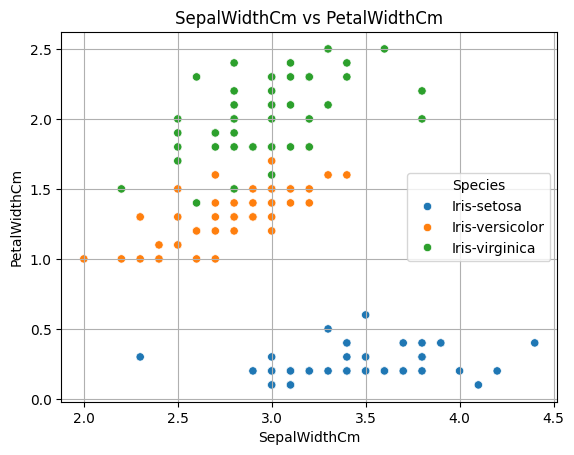

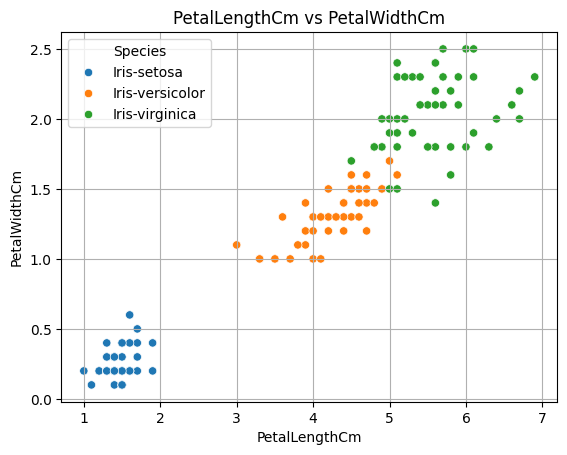

In [9]:
ploting(df,target='Species')

In [10]:
# S W P L, P W P L

In [11]:
# Logistic Regression (Regularization) 
# SVM
# Dession Tree
# Random Forest
# Voting
# Boosting (Ada,Gradient,Xg)
# Stacking

In [12]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import RidgeClassifier
# from sklearn.ensemble import Boosting

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_Lable = le.fit_transform(df['Species'])
df['Species'] = df_Lable

In [15]:
X = df.iloc[:,2:4].values
y= df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
def ModelTrainPredict(clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test,y_pred))

In [17]:
dt = DecisionTreeClassifier(max_depth=3)

ModelTrainPredict(dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [18]:
LR = LogisticRegression(solver='saga')
LR.fit(X_train,y_train)
LR.predict(X_test)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

[Text(0.375, 0.875, 'x[0] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[0] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[1] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'x[1] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.875, 0.125, 'gini = 0.056\nsamples = 35\nvalue = [0, 1, 34]')]

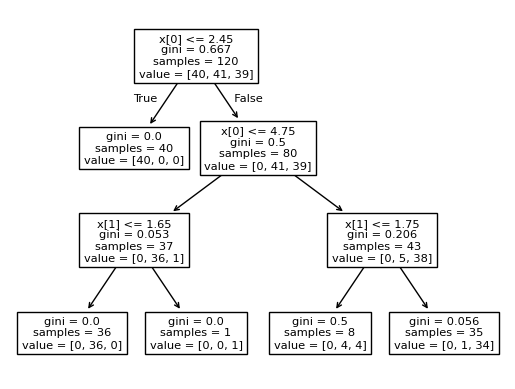

In [19]:
from sklearn.tree import plot_tree
plot_tree(dt)

In [20]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
LR.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

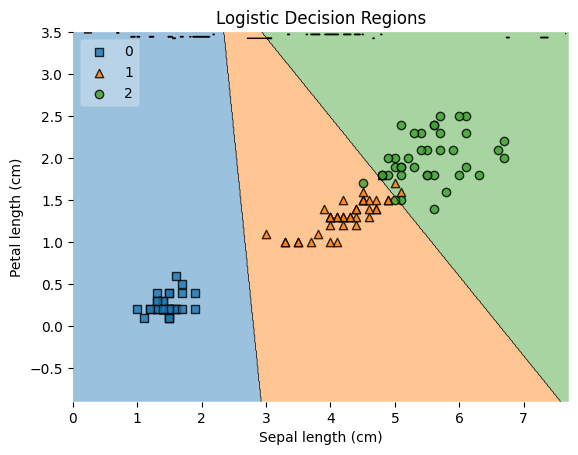

In [21]:
plot_decision_regions(X_train,y_train,LR,legend=2)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('Logistic Decision Regions')
plt.show()

In [41]:
svc = SVC( kernel = 'poly',degree=2)
svc.fit(X_train,y_train)
# ModelTrainPredict(svc)
y_train_pred = svc.predict(X_train)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      0.93      0.94        41
           2       0.93      0.95      0.94        39

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



<Axes: >

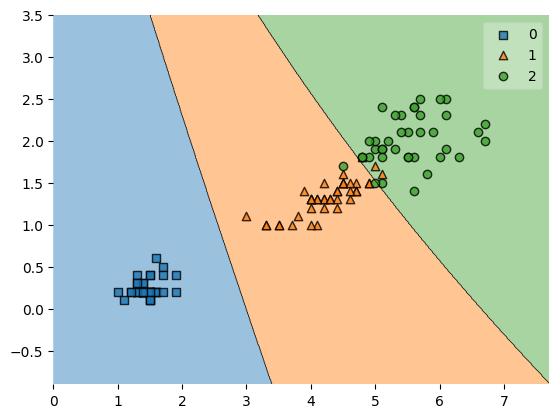

In [42]:
plot_decision_regions(X_train,y_train,svc)

In [54]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train,y_train)
y_train_pred_dt = dt.predict(X_train)
print(classification_report(y_train_pred_dt,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.98      1.00      0.99        40
           2       1.00      0.97      0.99        40

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



<Axes: >

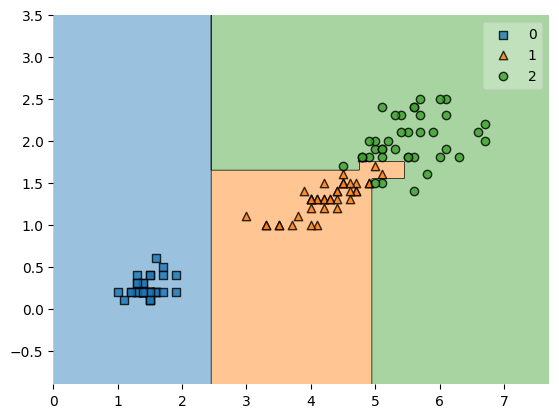

In [55]:
plot_decision_regions(X_train,y_train,dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

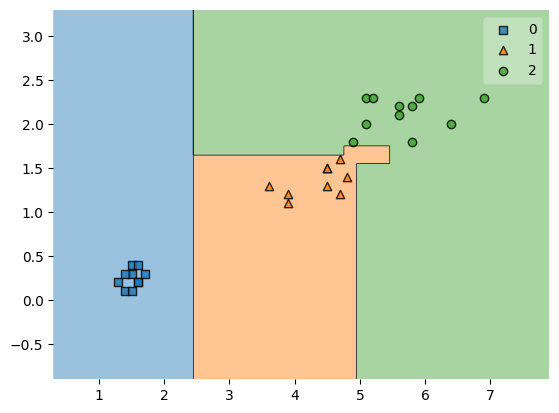

In [58]:
print(classification_report(dt.predict(X_test),y_test))
plot_decision_regions(X_test,y_test,dt)

In [59]:
X = df.iloc[:,0:4].values
y= df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print(classification_report(lr.predict(X_train),y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.93      1.00      0.96        38
           2       1.00      0.93      0.96        42

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



In [67]:
dt1 = DecisionTreeClassifier(max_depth=6)
dt1.fit(X_train,y_train)
print(classification_report(dt1.predict(X_train),y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

